In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

In [3]:
df = pd.read_csv('testjobs.csv')

In [4]:
df.shape

(57, 12)

In [5]:
df.columns

Index(['Job_Title', 'Job_Link', 'Job_Type', 'Job_Duration', 'Job_Description',
       'Proposals', 'Amount', 'Country', 'Score', 'Rating', 'Reviews',
       'Budget'],
      dtype='object')

In [6]:
df.head(3)

,Job_Title,Job_Link,Job_Type,Job_Duration,Job_Description,Proposals,Amount,Country,Score,Rating,Reviews,Budget
0,AI System: Draw an Architecture Diagram,https://www.upwork.com/jobs/System-Draw-Archit...,Hourly: $15-$40,"Less than 1 month, Less than 30 hrs/week",I need someone to draw an architecture diagram...,10 to 15,500.0,United States,4.0,NaN,NaN,NaN
1,Machine Learning Expert Needed for Consultation,https://www.upwork.com/jobs/Machine-Learning-E...,Hourly: $25-$40,"Less than 1 month, Less than 30 hrs/week",An ML expert is needed for thesis consultation...,15 to 20,200.0,Nigeria,0.0,5.00,26.0,NaN
2,AI expert to develop system to recruit patients,https://www.upwork.com/jobs/expert-develop-sys...,Hourly,"Less than 1 month, Less than 30 hrs/week",I need an AI expert to develop an AI-based sys...,10 to 15,0.0,United States,1.0,4.93,4.0,NaN


In [7]:
df['Job_Type'] = df['Job_Type'].str.split(':').str[0]

In [8]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\Arunim\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Arunim\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Arunim\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


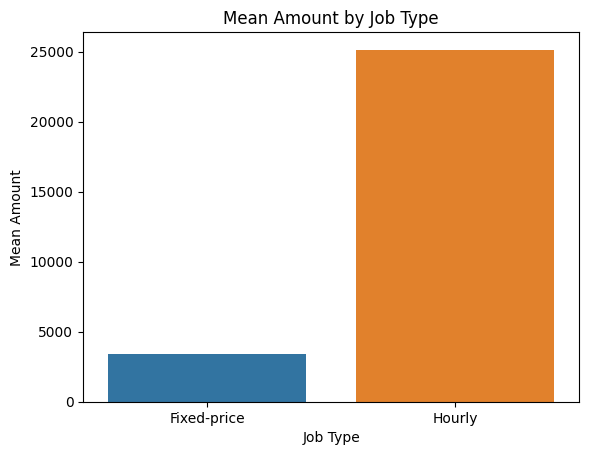

In [11]:
mean_amount = df.groupby('Job_Type')['Amount'].mean().reset_index()

sns.barplot(x='Job_Type', y='Amount', data=mean_amount)
plt.xlabel('Job Type')
plt.ylabel('Mean Amount')
plt.title('Mean Amount by Job Type')
plt.show()


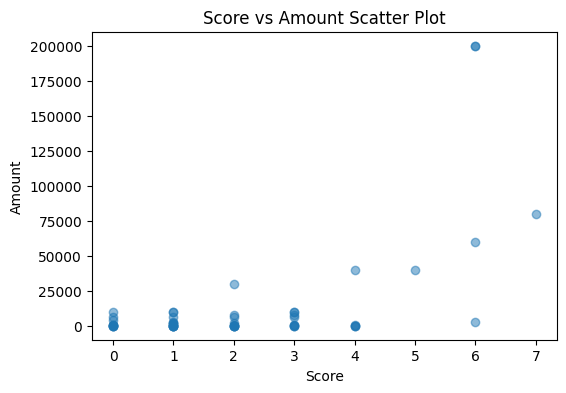

In [13]:
%matplotlib inline
plt.figure(figsize=(6, 4))
plt.scatter(df['Score'], df['Amount'], alpha=0.5)
plt.title('Score vs Amount Scatter Plot')
plt.xlabel('Score')
plt.ylabel('Amount')
# plt.grid(True)
plt.show()


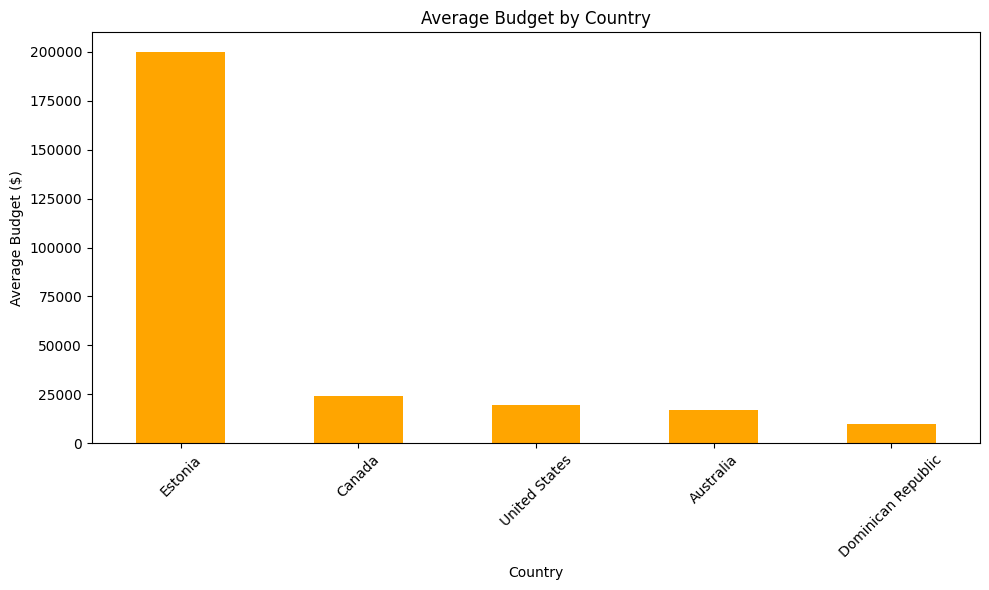

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

avg_budget_by_country = df.groupby('Country')['Amount'].mean().sort_values(ascending=False)
top_5_countries = avg_budget_by_country.head(5)
top_5_countries.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title('Average Budget by Country')
plt.xlabel('Country')
plt.ylabel('Average Budget ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


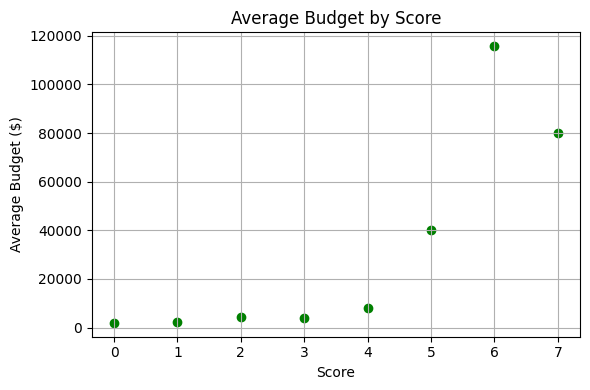

In [23]:

# Comparing average budget by score
avg_budget_by_score = df.groupby('Score')['Amount'].mean().sort_values(ascending=False)
plt.figure(figsize=(6, 4))
plt.scatter(avg_budget_by_score.index, avg_budget_by_score.values, color='green')
plt.title('Average Budget by Score')
plt.xlabel('Score')
plt.ylabel('Average Budget ($)')
plt.grid(True)
plt.tight_layout()
plt.show()
